## Term Project: Heart Disease Prediction

In [48]:
# First I will import some needed libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
from imp import reload
import nltk
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline
import seaborn as sns 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import re
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

[nltk_data] Downloading package wordnet to /Users/Robyn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Importing Heart Disease Data

In [2]:
# I will use pandas to pull the data to create a data frame to work from
Heart_Data = pd.read_csv('heart.csv')
Heart_Data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Review Heart Disease Data Set

In [4]:
# First I will use info to see the Dtype of each variable 
# from the data frame
Heart_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Above we see that the variables Age, RestingBP, Cholesterol, FastingBS, MaxHR, and HeartDisease are all integers. While Sex, ChestPainType, RestingECG, and ST_Slope are ojects. 

In [6]:
# Next I will use describe to see the count, mean, std, min, and more 
# of each variable from the data frame
Heart_Data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


While seen in our output of the description we see that the mean age of individuals in the data set are 53 years old. With a mean max heart rate of 136.80. While an issue I am seeing is Resting blood pressure as we see the min is zero which is not possible as you need a pulse to be alive so these will need to be removed.

In [7]:
# I will now search for duplicates in the data set 
# through the use of duplicated.
print('Duplicates in data set:', len(Heart_Data[Heart_Data.duplicated()]))

Duplicates in data set: 0


Above we see that the data set doesn't have any duplicated data

In [9]:
# I will now use isnull and sum to check for missing values 
# from the variables in the data set
print('Missing values in data set:', Heart_Data.isnull().sum().sum())

Missing values in data set: 0


As seen above isnull shows us that the data set doesn't have any missing data

In [10]:
# Next I will display the dimensions of the disney dataframe
Heart_Data.shape

(918, 12)

Above we see that we have 12 columns with 918 rows of data.

## Exploratory Data Analysis (EDA) and Visualizations 

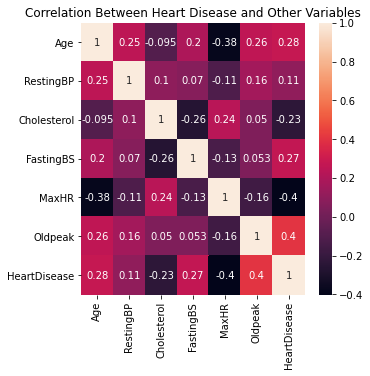

In [42]:
# I will first use seaborn to create a heat map that shows the correlation between heart disease and the other variables
Heart_Correlation = Heart_Data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(Heart_Correlation, annot=True);
plt.title('Correlation Between Heart Disease and Other Variables');

Above we see that the highest correlation with heart disease stands with Oldpeak and MaxHR coming in at only 40% which could be two variables to watch when building the models. 

In [39]:
# I will use plotly and graph_objects to see the difference 
# is individuals that have heart disease and individuals 
# that do not in the data set
import plotly.graph_objects as go
labels = ['Heart disease', 'Healthy']
colors = ['red', 'blue']
values = Heart_Data['HeartDisease'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values, hole=.3)])
fig.update_traces(hoverinfo='label+value',
                  textfont_size=15,marker=dict(colors=colors))
fig.update_layout(annotations=[dict(text='Patients With and Withought Heart Disease', 
            x=1.0, y=1.2, font_size=12, showarrow=False)])
fig.show()

The variable Heart Disease is over with 508 or 55.3% of the patients with heart disease while we see 410 or 44.70% without heart disease.

In [43]:
# I will now create a set that contains only the categorical variables
Heart_Cat_variable = Heart_Data.select_dtypes(include=object).columns

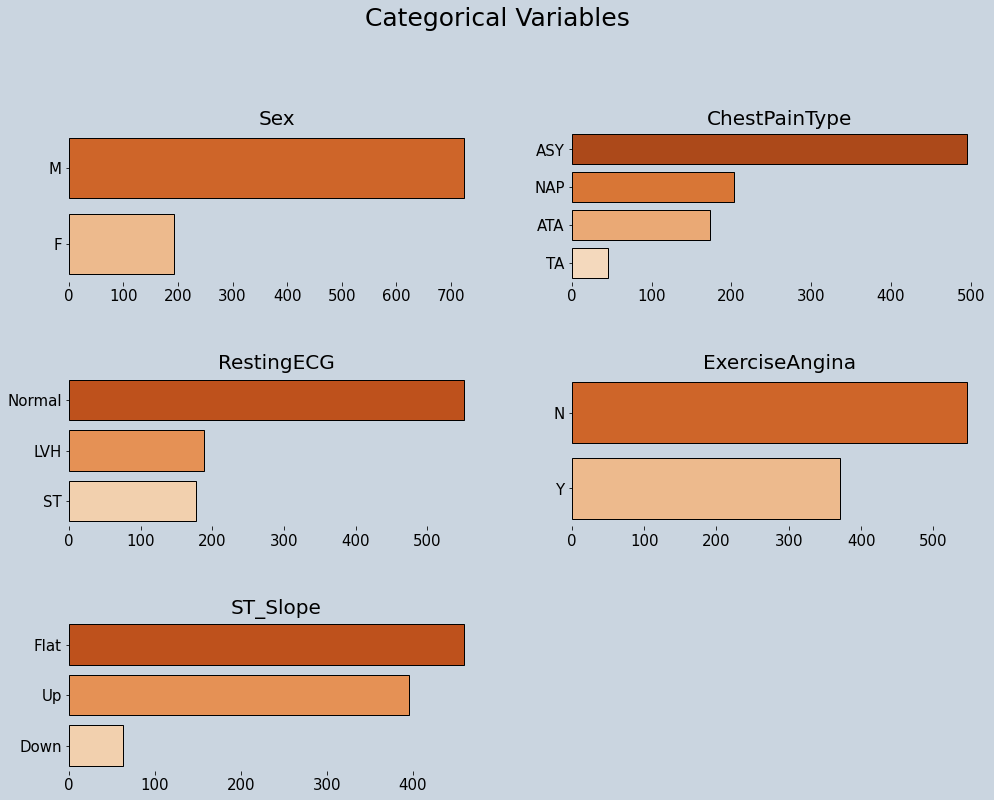

In [68]:
# Next I will select my coloring and create a loop for my variables
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('#CAD5E0')
mpl.rcParams['font.family'] = 'DejaVu Sans'

def heart_plt():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=15, color='black')
    plt.xticks(fontsize=15, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)

for i in (enumerate(Heart_Cat_variable)):
    plt.subplot(4, 2, i[0]+1)
    sns.countplot(y = i[1], data = Heart_Data, order=Heart_Data[i[1]].value_counts().index, palette='Oranges_r', edgecolor='black')
    heart_plt()
    plt.suptitle('Categorical Variables', fontsize=25)

Above we see that males out way females in this dataset as over 700 are male and Iam seeing less than 200 females

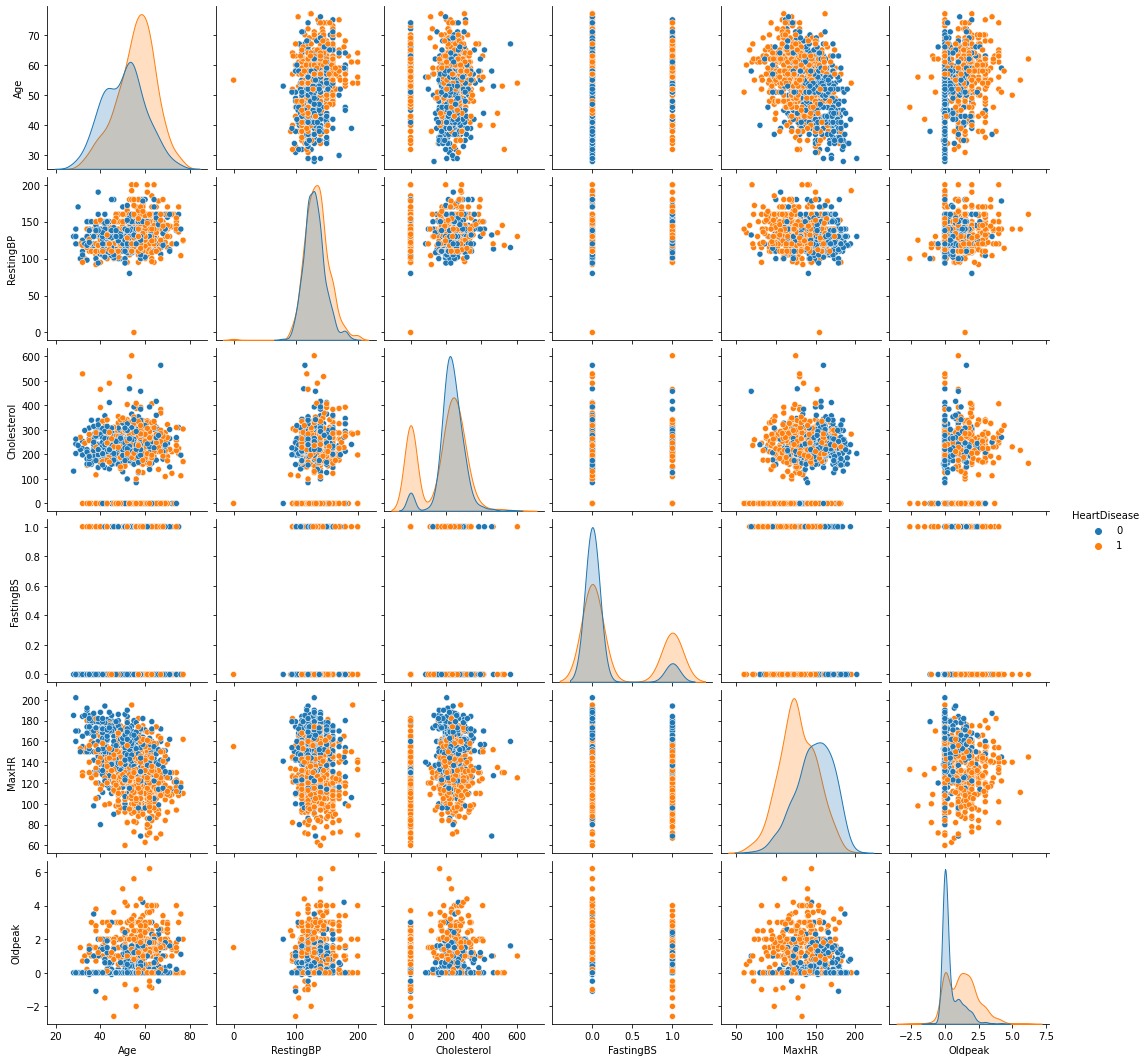

In [45]:
# First I will use seaborn to create a pairplot to that could 
# have an affect on heart disease
sns.pairplot(Heart_Data,hue="HeartDisease");

As seen in the pairplot above we see that some variables are connected with heart disease. Such as individuals with higher resting BP and individuals that are older in age. While another factor that is currently seen is patients with heart disease having high sugar and cholesterol. 

A model that I plan on using is the Gradient Boosted Model as this model will create a prediction model that is made up of decision trees that are created one tree at a time. This model uses techniques that are considered machine learning that is for the most part boosted. Once a decision tree is created it will fix errors made from previous trees. Another model I plan on using is the Random Forest Classifier as this is one of the most common algorithms that is used. While also being a classifier that can handle large sets of data that is comprised of an assortment of decision trees. As these trees are dependent on the value random vector sample and are created to the largest degree achievable. When using Random Forest for prediction the classifier will use random subsets of the training data which is known as bagging that can have multiple samples to generate an overall average. The reasoning for using Random Forest is to generate a solid learner compared to the Gradient Boosted Model as these will be two great models to compare. 

## Data Cleaning

In [70]:
# I will use describe to see the count, mean, std, min again 
# from each of the variables from the data frame to see if 
# we have any zeros
Heart_Data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Above we can see that we have a zero min for the RestingBP and Cholesterol that need to be replaced with the median as these two variables cannot be zero as you need a rate to be alive. Due to this I will be replacing the zeros with a mean.

In [71]:
# First I will replace the zeros from Cholesterol with the mean
# from the data set Heart_Data.
Heart_Data['Cholesterol'].replace(0, Heart_Data['Cholesterol'].median(),inplace=True)

In [72]:
# Next I will replace the zeros from RestingBP with the mean
# from the data set Heart_Data.
Heart_Data['RestingBP'].replace(0, Heart_Data['RestingBP'].median(),inplace=True)

In [73]:
# I will now use describe again to see the change in min for RestingBP
# and Cholesterol
Heart_Data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,240.581699,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.982967,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


As seen above we see the min for Cholesterol is 85.00 and RestingBP is 80.00. Which has gotten rid of outliers that would be considered outliers in error as these two variables need a numeric value greater than zero.

## Create Dummy Variables

In [74]:
# Next I will create dummy variables for my categorical variables
Heart_Cat = Heart_Data.select_dtypes(include=object).columns
Updated_Heart_Data = pd.get_dummies(Heart_Data, 
                            columns=Heart_Cat, drop_first=True)  
Updated_Heart_Data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


The Categoriacl variables have now been transformed into dummy variables through the use of get_dummies.

## Split the Updated_Heart_Data into training and test sets

In [75]:
# I will now split the data into training and test and create 
# my X and Y variables
Y, X = Updated_Heart_Data['HeartDisease'], Updated_Heart_Data.drop(columns='HeartDisease')
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

## Gradient Boost Model

In [84]:
# The first model I will be creating is the Gradient Boosted 
# model but create an empty list and create a tree list 
# for different numbers of trees
from sklearn.ensemble import GradientBoostingClassifier
GBlist_Error = list()
GB_trees = [3, 5, 10, 15, 25, 35, 50, 75, 90, 100]

In [79]:
# I will import some needed models
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,f1_score,classification_report,recall_score
from sklearn.preprocessing import label_binarize

In [85]:
# Initialize the gradient boost classifier Fit the model
for tree_number in GB_trees:
    GBC = GradientBoostingClassifier(n_estimators=tree_number, random_state=42)
    print(f'Fit {tree_number} trees to the model')
    GBC.fit(x_train.values, y_train.values)
    GB_y_pred = GBC.predict(x_test)
    GBC_Error = 1.0 - accuracy_score(y_test, GB_y_pred)
    GBlist_Error.append(pd.Series({'tree_number': tree_number, 'GBC_Error': GBC_Error}))

GB_Heart_Error = pd.concat(GBlist_Error, axis=1).T.set_index('tree_number')
GB_Heart_Error

Fit 3 trees to the model
Fit 5 trees to the model
Fit 10 trees to the model
Fit 15 trees to the model
Fit 25 trees to the model
Fit 35 trees to the model
Fit 50 trees to the model
Fit 75 trees to the model
Fit 90 trees to the model
Fit 100 trees to the model


,GBC_Error
tree_number,
3.0,0.184783
5.0,0.173913
10.0,0.152174
15.0,0.149457
25.0,0.141304
35.0,0.146739
50.0,0.157609
75.0,0.160326
90.0,0.157609


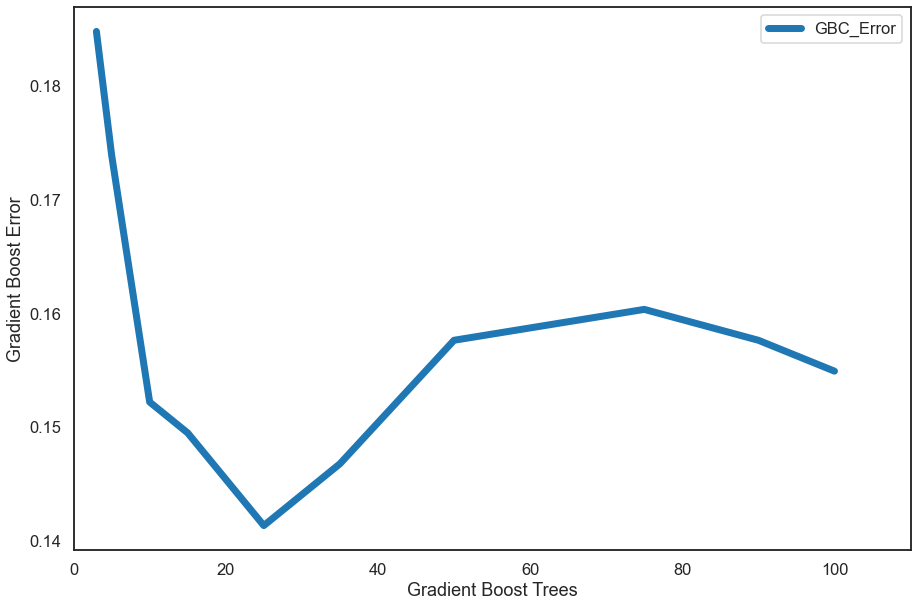

In [113]:
# I will now plot my Gradient Boost error for the number of trees
plot_boost = GB_Heart_Error.plot(figsize=(15, 10), linewidth=7)
plot_boost.set(xlabel='Gradient Boost Trees', ylabel='Gradient Boost Error')
plot_boost.set_xlim(0, max(GB_Heart_Error.index)*1.1);

As seen above the the lowest error we see is at 25 trees and levels off and heads back down at around 80 trees.

In [93]:
# First I will select the parameters I will liketo use to fit
param_grid = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],'n_estimators': GB_trees,
              'subsample': [1.0, 0.5],'max_features': [2, 3, 4]}

In [96]:
# Next I will create the grid search using GridSearchCV with 
# a random state of 42 like in the train and test set
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, scoring='accuracy', n_jobs=-1)

In [97]:
# Last I will conduct my grid search and determine the 
# best model for the Gradient Boost
GV_GBC = GV_GBC.fit(x_train, y_train)
model_boost = GV_GBC.best_estimator_
y_pred_boost = GV_GBC.predict(x_test)
model_boost

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.075, loss='deviance', max_depth=3,
                           max_features=3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Above we see the best model for the Gradient Boost with parameters of max_features=3, subsample=1.0, random_state=42, and more that will make up the perfect model.

In [116]:
# I will now print the precision, recall, and f1-score 
# for the Gradient Boost model
print(classification_report(GV_GBC.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       162
           1       0.85      0.91      0.88       206

    accuracy                           0.86       368
   macro avg       0.86      0.85      0.85       368
weighted avg       0.86      0.86      0.86       368



Above we see the accuracy of the f1-score for the Gradient Boost model is 0.86 with support of 368. while the precision for the macro avg and weighted avg is 0.86

## Random Forest Classifier Model

In [107]:
# First I will set my estimator for my random forest and 
# create an empty list.
Random_Forest = RandomForestClassifier(oob_score=True, 
                            random_state=42, warm_start=True, n_jobs=-1)
bag_list = list()

In [108]:
# Next I create a random trees that will go through a 
# number of trees and fit the model and print it out
for random_trees in [25, 40, 50, 75, 100, 150, 225, 350, 400]:
    Random_Forest.set_params(n_estimators=random_trees)
    Random_Forest.fit(x_train, y_train)
    bag_error = 1 - Random_Forest.oob_score_
    bag_list.append(pd.Series({'random_trees': random_trees, 'Out of Bag Error': bag_error}))
Random_Bag_Error = pd.concat(bag_list, axis=1).T.set_index('random_trees')
Random_Bag_Error

,Out of Bag Error
random_trees,
25.0,0.163636
40.0,0.154545
50.0,0.147273
75.0,0.145455
100.0,0.147273
150.0,0.141818
225.0,0.141818
350.0,0.140000
400.0,0.136364


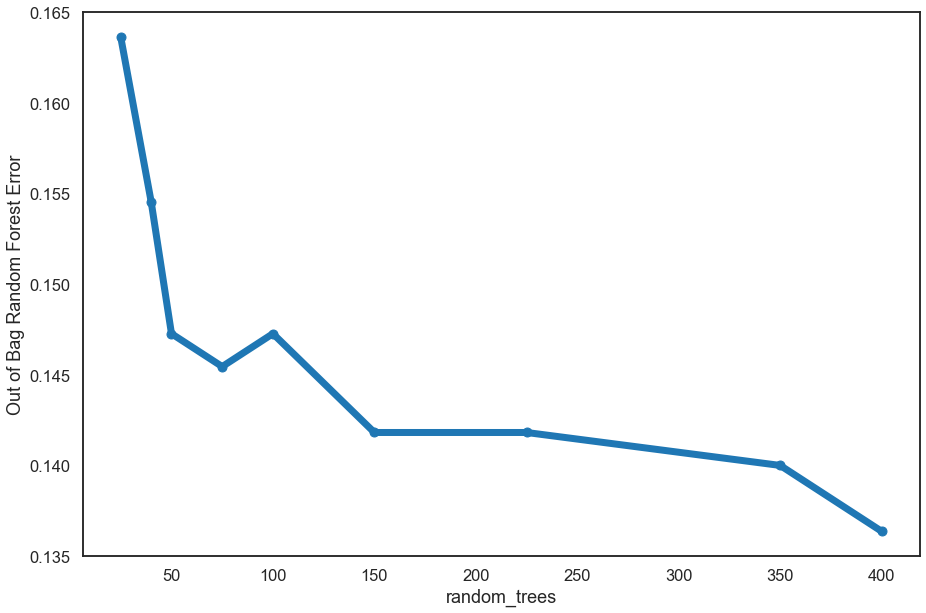

In [112]:
# I will now plot my Random Trees error for the number of trees
Random_plot = Random_Bag_Error.plot(legend=False, marker='o', figsize=(15, 10), linewidth=7)
Random_plot.set(ylabel='Out of Bag Random Forest Error');

Above we see that for the random forest the minimum error is at 400

In [114]:
# Now that we know the minimum error I will set my estimator to 400 trees
Random_Forest_400 = Random_Forest.set_params(n_estimators=400)
Random_Forest_y_pred = Random_Forest_400.predict(x_test)
Random_Forest_y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [115]:
# I will now print the precision, recall, and f1-score 
# for the random forest model
print(classification_report(Random_Forest_400.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       156
           1       0.87      0.91      0.89       212

    accuracy                           0.87       368
   macro avg       0.87      0.86      0.86       368
weighted avg       0.87      0.87      0.87       368



Above we see the accuracy of the f1-score for the Random Forest model is 0.87 which is .01 higher than the Gradient Boost but has the same support of 368. while the precision for the macro avg and weighted avg is 0.87 which is also higher than the Gradient Boost.

## Random Forest and Gradient Boost Model Reviews

In [122]:
# Next I will review the accuracy of the Random Forest 
# and Gradient Boost models
RF_GB_Accuracy = {}
RF_GB_Accuracy["Random Forest Model"] = [f1_score(y_test,Random_Forest_400.predict(x_test),average="weighted"), Random_Forest_400.score(x_test,y_test), recall_score(y_test,Random_Forest_400.predict(x_test), average = 'binary')]
RF_GB_Accuracy["Gradient Boost Model"] = [f1_score(y_test,GV_GBC.predict(x_test),average="weighted"), GV_GBC.score(x_test,y_test), recall_score(y_test,GV_GBC.predict(x_test), average = 'binary')]
RF_GB_Accuracy

{'Random Forest Model': [0.8674415350461646,
  0.8668478260869565,
  0.8687782805429864],
 'Gradient Boost Model': [0.8569442783099026,
  0.8559782608695652,
  0.8461538461538461]}

Above we see the Random Forest Model has the higher Accuracy of 0.8668 while the Gradient Boost is 0.8559. I will now create a bar plot to view each model and their scores. 

In [125]:
model_scores = ["F1-Score","Accuracy","Recall"]
Heart_data_Accuracy = pd.DataFrame(RF_GB_Accuracy.values(),columns = model_scores,index=RF_GB_Accuracy.keys())

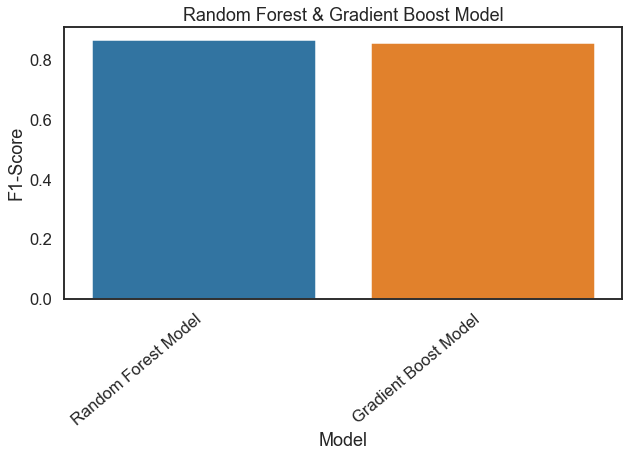

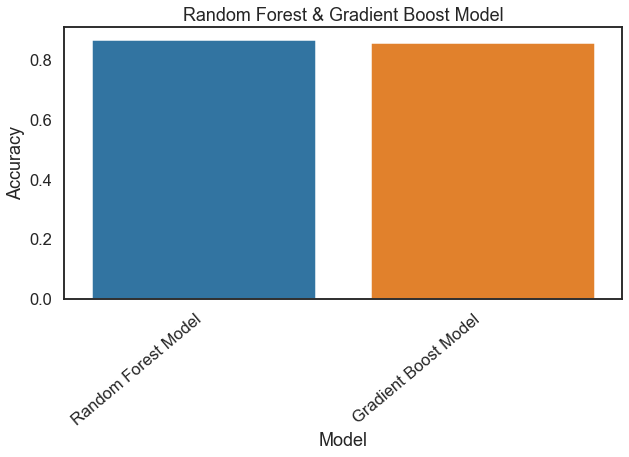

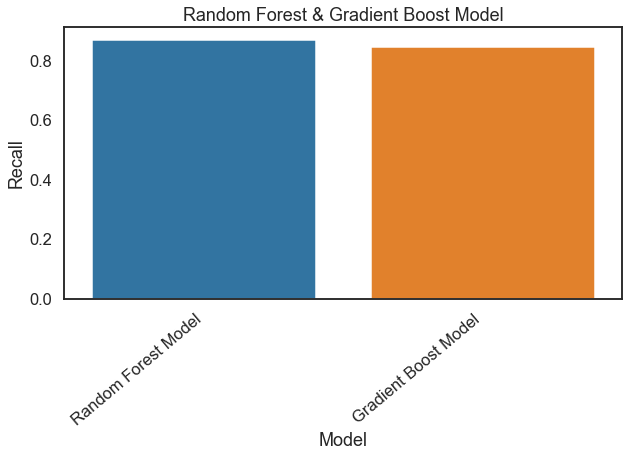

In [129]:
for model_scores in Heart_data_Accuracy.columns:
    fig = plt.figure(figsize = (10, 5))
    Heart_Plot = sns.barplot(y=Heart_data_Accuracy[model_scores],x=Heart_data_Accuracy.index)
    Heart_Plot.set_xticklabels(Heart_Plot.get_xticklabels(), rotation=40, ha="right") 
    plt.xlabel("Model")
    plt.ylabel(model_scores)
    plt.title("Random Forest & Gradient Boost Model")
    plt.show()

## Conclusion

As seen above the Gradient Boost Model shows a Recall of 0.8461 while the F1-Score is seen as 0.8569 and last the Accuracy is 0.8559. While the Recall for the Random Forest model is 0.8687 while the F1-Score is seen as 0.8674 and last the Accuracy is 0.8674. Which clearly shows us that the Random Forest model will be the best option when predicting patients with Heart Disease.